<a href="https://colab.research.google.com/github/PYMaksim/PYMaksim/blob/main/%D0%92%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%B5_%D1%80%D1%8F%D0%B4%D1%8B%2C_%D0%BE%D0%B1%D1%89%D0%B0%D1%8F_%D1%82%D0%B5%D0%BE%D1%80%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Файл: daily-total-female-births-in-cal.csv, Количество записей ДО предобработки: 365
Удалено записей с пропусками или аномалиями: 0
Оставшиеся записи: 365


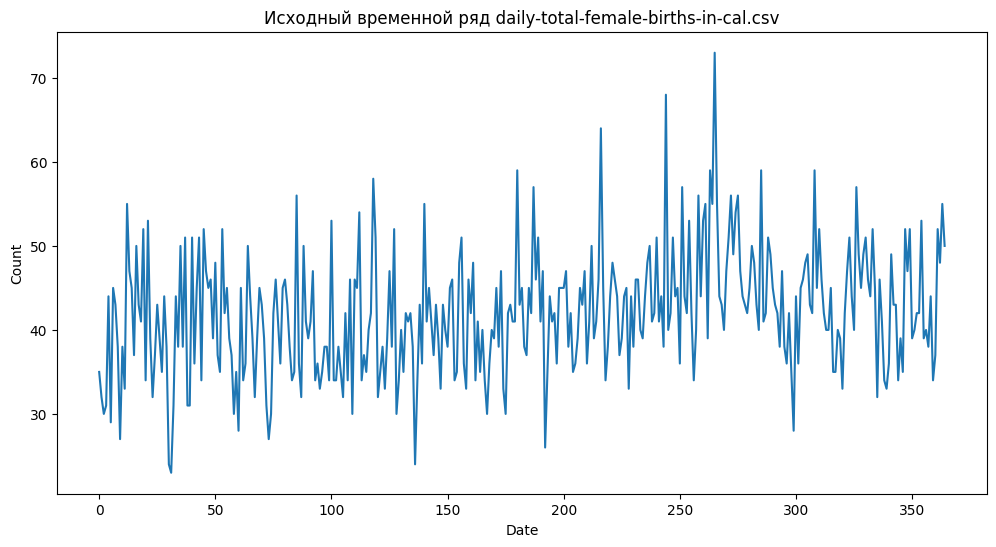


Тест на стационарность (daily-total-female-births-in-cal.csv)
ADF Statistic: -12.62517863387136
p-value: 1.5472400091968453e-23
Получили стационарный ряд!


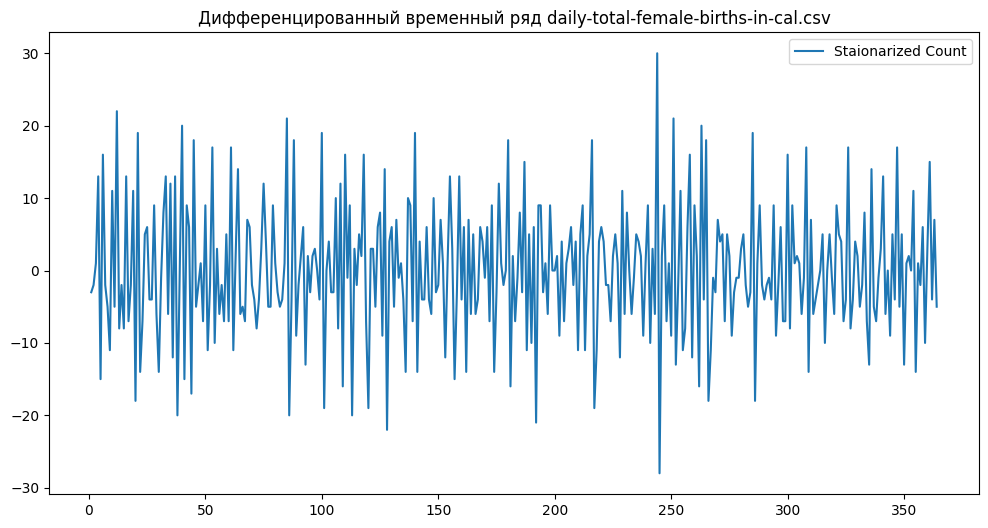


Файл: international-airline-passengers.csv, Количество записей ДО предобработки: 144
Удалено записей с пропусками или аномалиями: 0
Оставшиеся записи: 144


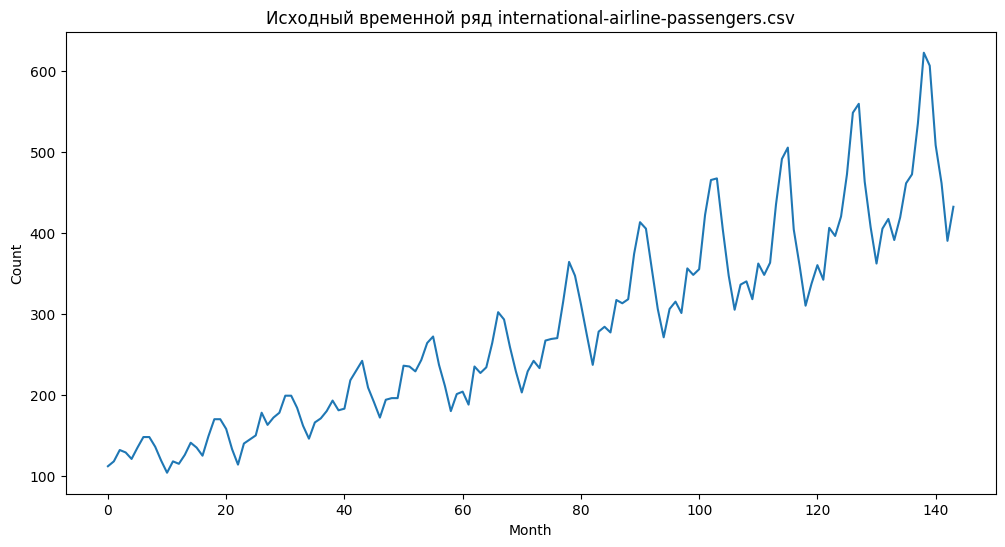


Тест на стационарность (international-airline-passengers.csv)
ADF Statistic: -2.8292668241700047
p-value: 0.05421329028382478
Требуются дополнительные преобразования


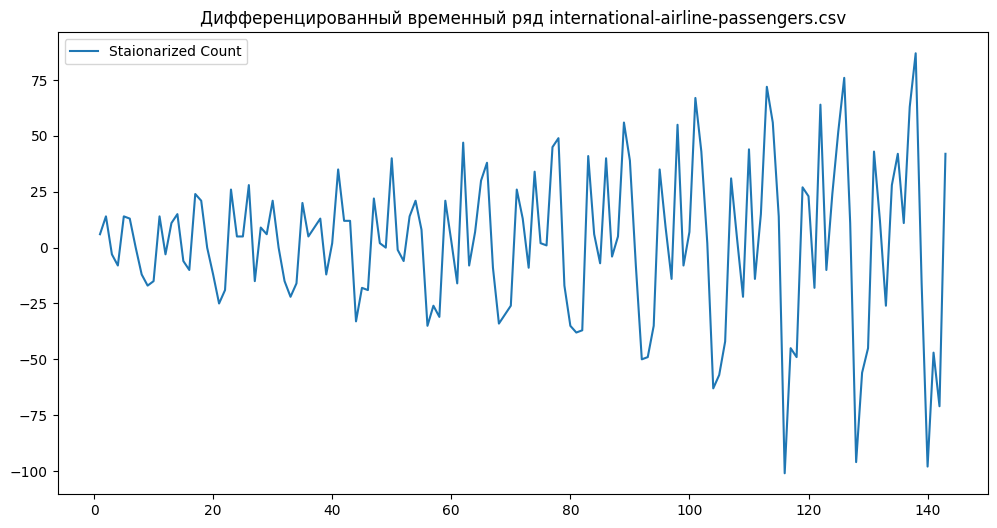


Файл: mean-monthly-air-temperature-deg.csv, Количество записей ДО предобработки: 240
Удалено записей с пропусками или аномалиями: 0
Оставшиеся записи: 240


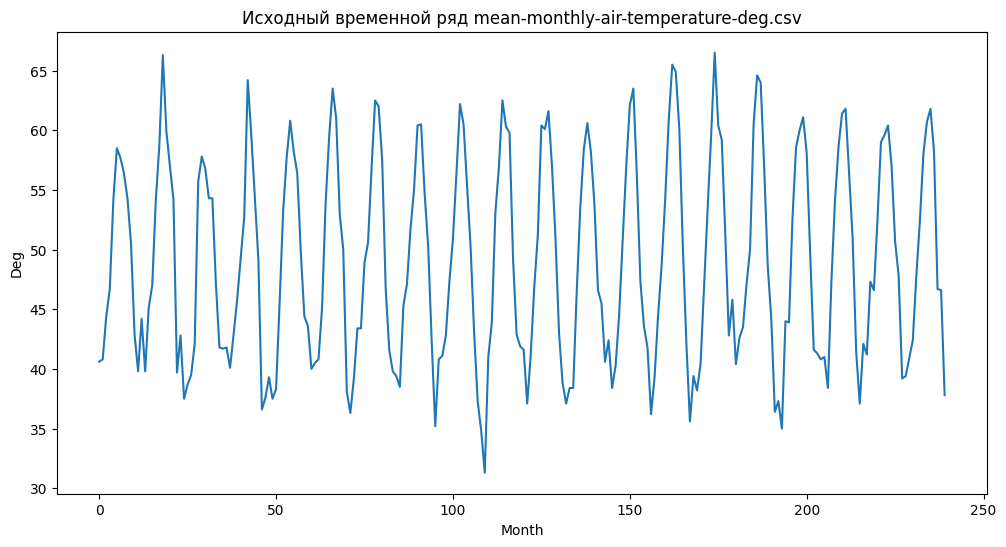


Тест на стационарность (mean-monthly-air-temperature-deg.csv)
ADF Statistic: -12.25927089189215
p-value: 9.157883248646586e-23
Получили стационарный ряд!


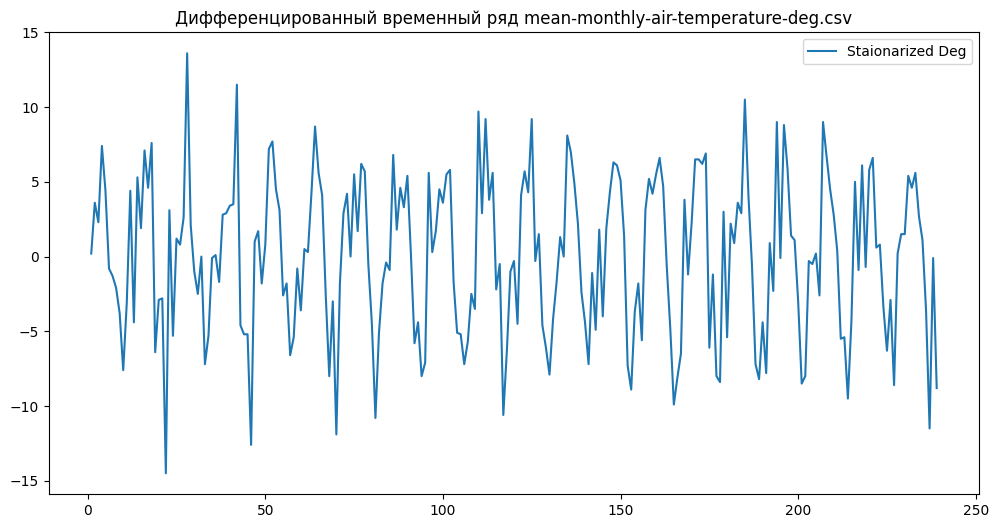


Файл: monthly-boston-armed-robberies-j.csv, Количество записей ДО предобработки: 118
Удалено записей с пропусками или аномалиями: 0
Оставшиеся записи: 118


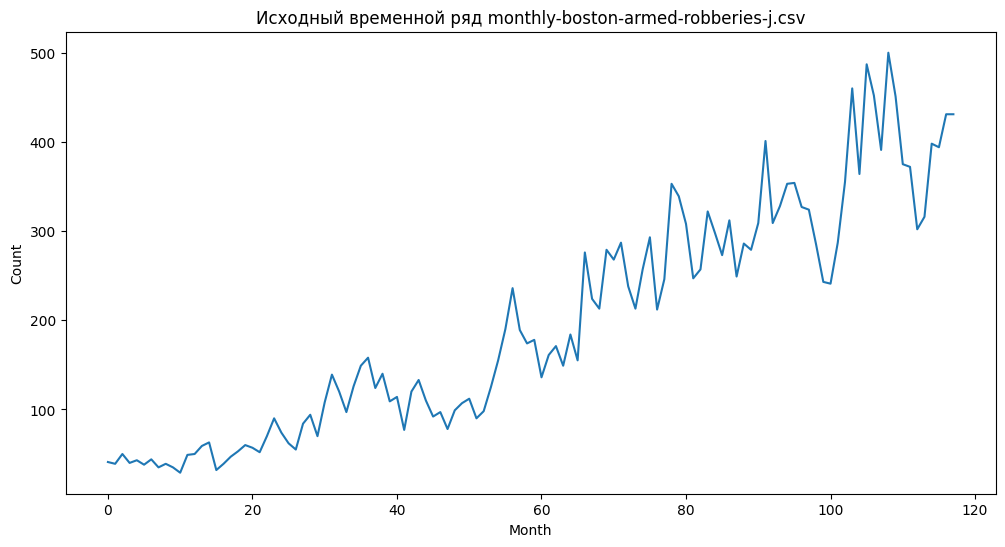


Тест на стационарность (monthly-boston-armed-robberies-j.csv)
ADF Statistic: -7.42856447506721
p-value: 6.450795412686658e-11
Получили стационарный ряд!


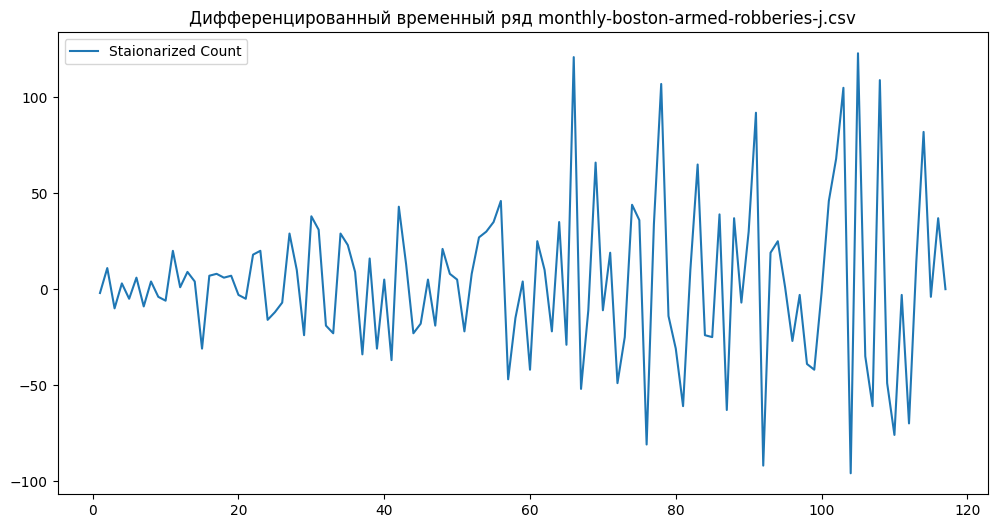


Файл: monthly-sales-of-company-x-jan-6.csv, Количество записей ДО предобработки: 77
Удалено записей с пропусками или аномалиями: 0
Оставшиеся записи: 77


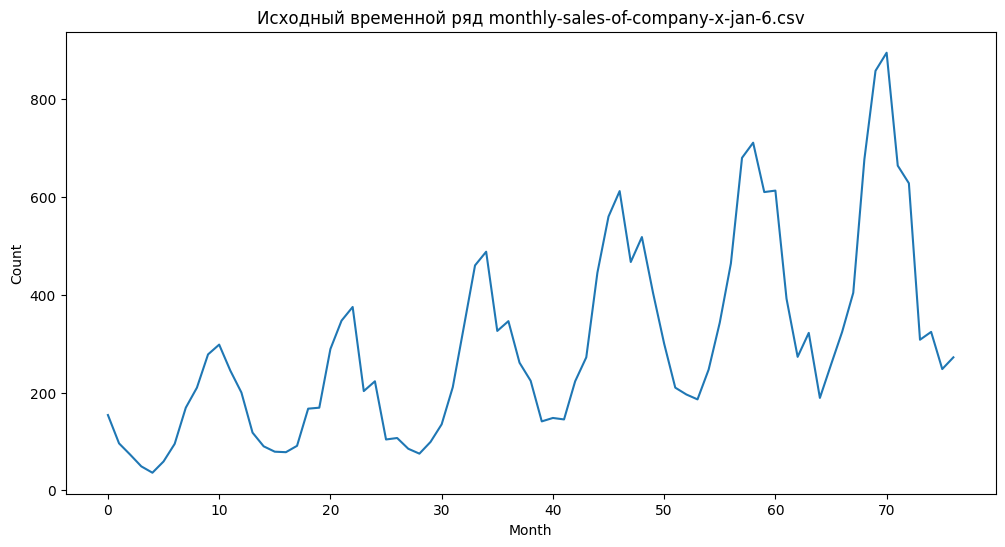


Тест на стационарность (monthly-sales-of-company-x-jan-6.csv)
ADF Statistic: -2.587969767062948
p-value: 0.0955092507855888
Требуются дополнительные преобразования


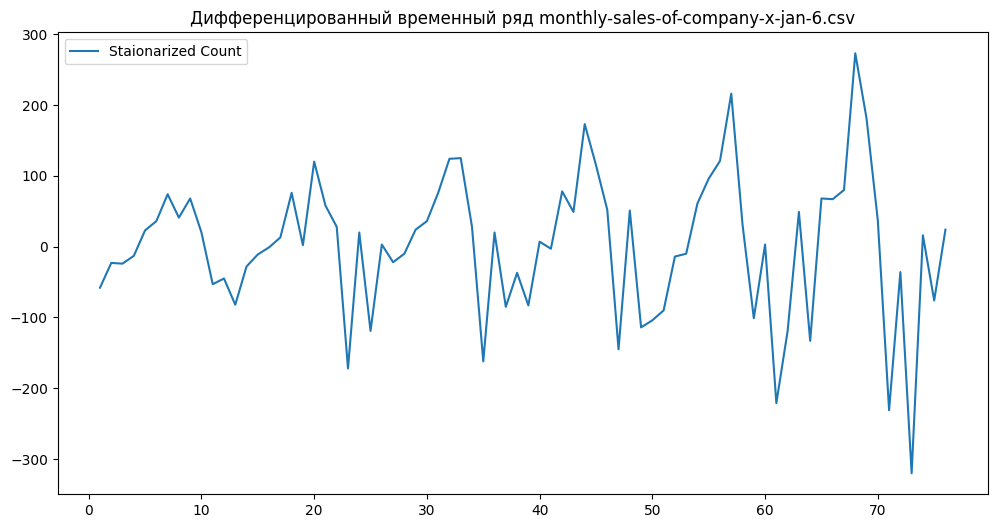


Файл: weekly-closings-of-the-dowjones-.csv, Количество записей ДО предобработки: 162
Удалено записей с пропусками или аномалиями: 0
Оставшиеся записи: 162


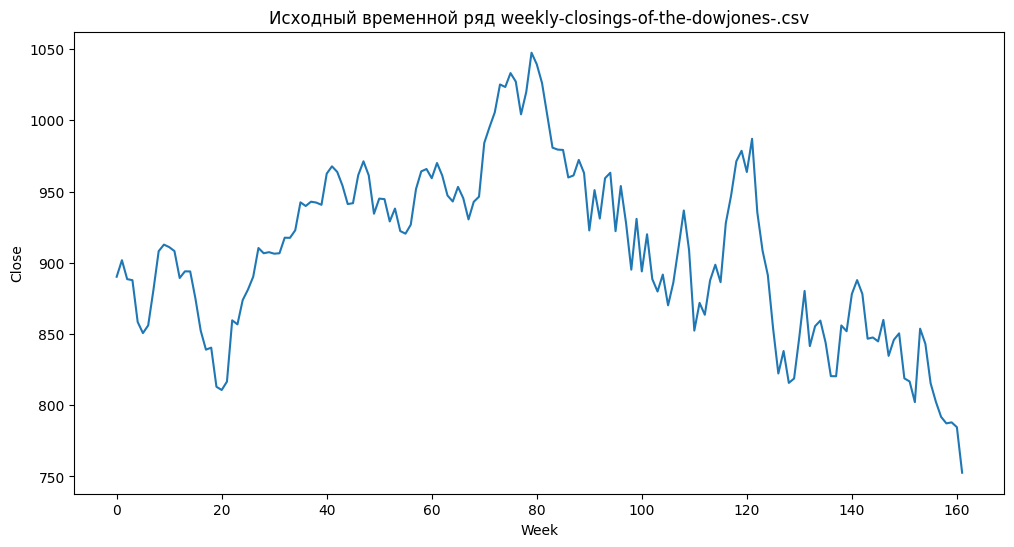


Тест на стационарность (weekly-closings-of-the-dowjones-.csv)
ADF Statistic: -13.025207881234948
p-value: 2.4075864037417794e-24
Получили стационарный ряд!


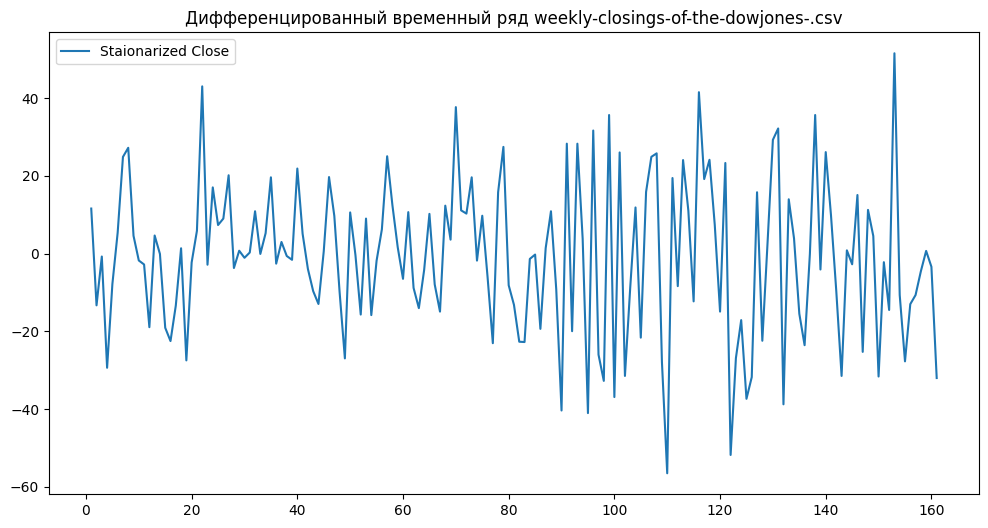

In [9]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Список файлов и соответствующие значения столбцов
data_files = {
    'daily-total-female-births-in-cal.csv': ('Date', 'Count'),
    'international-airline-passengers.csv': ('Month', 'Count'),
    'mean-monthly-air-temperature-deg.csv': ('Month', 'Deg'),
    'monthly-boston-armed-robberies-j.csv': ('Month', 'Count'),
    'monthly-sales-of-company-x-jan-6.csv': ('Month', 'Count'),
    'weekly-closings-of-the-dowjones-.csv': ('Week', 'Close')
}

# Процедура предобработки данных
def preprocess_dataframe(df, val_col):
    """
    Предобработка данных: удаление NaN и бесконечных значений.
    """
    initial_rows = len(df)
    print(f"\nФайл: {filename}, Количество записей ДО предобработки: {initial_rows}")

    # Чистим NaN и бесконечности
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(subset=[val_col], inplace=True)

    final_rows = len(df)
    removed_count = initial_rows - final_rows
    print(f"Удалено записей с пропусками или аномалиями: {removed_count}\nОставшиеся записи: {final_rows}")

    return df

# Основное тело программы
def test_and_plot_stationarity(dataframe, filename, date_col, val_col):
    # Читаем и чистим данные
    dataframe = preprocess_dataframe(dataframe, val_col)

    # Отображаем исходный график
    plt.figure(figsize=(12, 6))
    plt.plot(dataframe[val_col])
    plt.title(f'Исходный временной ряд {filename}')
    plt.xlabel(date_col)
    plt.ylabel(val_col)
    plt.show()

    # Производим дифференцирование
    diff_df = dataframe.copy()
    diff_df[f'diff_{val_col}'] = diff_df[val_col].diff().dropna()

    # Перед проведением теста фильтруем ещё раз любые потенциальные ошибки
    clean_diff_values = diff_df[f'diff_{val_col}'].replace([np.inf, -np.inf], np.nan).dropna().values

    # Тест Дикки-Фуллера
    try:
        result = adfuller(clean_diff_values)
        print(f'\nТест на стационарность ({filename})\nADF Statistic: {result[0]}\np-value: {result[1]}')
        if result[1] <= 0.05:
            print("Получили стационарный ряд!")
        else:
            print("Требуются дополнительные преобразования")
    except Exception as e:
        print(f"Произошла ошибка при проведении теста на стационарность: {e}")

    # Строим итоговый график
    plt.figure(figsize=(12, 6))
    plt.plot(diff_df[f'diff_{val_col}'], label=f'Staionarized {val_col}')
    plt.title(f'Дифференцированный временный ряд {filename}')
    plt.legend()
    plt.show()

# Основной цикл обработки всех файлов
for filename, columns in data_files.items():
    df = pd.read_csv(filename)
    date_col, val_col = columns
    test_and_plot_stationarity(df, filename, date_col, val_col)